## __Gradient Descent with Momentum__

**Issues with the gradient descent algorithm:**

- The progression of the search can fluctuate within the search space based on the gradient.
- This behavior can impede the progress of the search, particularly in optimization problems where the overall trend or shape of the search space is more valuable than specific gradients encountered along the way.


**Introduction to Momentum**

- It serves as an extension to the gradient descent optimization algorithm, aiming to expedite the optimization process by incorporating historical information into the parameter update equation.
- This is achieved by considering the gradients encountered in previous updates.
- In this approach, an additional hyperparameter is introduced to govern the degree of historical momentum included in the update equation.

Let's understand how it works.

## Steps to be followed:
1.  Import the required libraries
2.  Define the objective function
3.  Define the gradient descent algorithm


### Step 1: Import the required libraries

- Import **numpy.asarray** to convert input data into an array.
- Import **numpy.random.rand** to generate random numbers from a uniform distribution.
- Import **numpy.random.seed** to set the seed for reproducible random number generation.
- Import **numpy.arange** to create an array of values within a specified range.
- Import **matplotlib.pyplot** that provides functions for creating plots and visualizations.


In [1]:
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from matplotlib import pyplot

### Step 2: Defining the objective function
- The function **objective** takes a single input parameter **x**.
- It returns the square of the input value as the output, representing the objective function.

In [2]:
def objective(x):
    return x**2.0

### Step 3: Define the gradient descent algorithm

- You must calculate the square of **x**, representing the objective function.
- The derivative(x) function computes the derivative of x with respect to the objective function.
- The **gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)** function implements the gradient descent algorithm. It initializes a solution within the specified bounds and iteratively updates it based on the objective and derivative functions. The function also tracks and stores the solutions and their corresponding scores.
- The random seed is set to 4 using seed(4) to ensure reproducibility.
- The bounds variable defines the lower and upper bounds for the solution space.
- Parameters such as the number of iterations (n_iter), step size (step_size), and momentum (momentum) are specified.
- The **gradient_descent** function is called with the provided arguments, and the resulting solutions and scores are stored.
- An array of input values (inputs) is generated using **arange** within the defined bounds.
- The objective function values (results) are computed for the input values.
- The objective function curve is plotted using **pyplot.plot** with inputs on the x-axis and results on the y-axis.
- The optimization path is visualized by plotting the solutions and scores as red dots connected by lines using pyplot.plot.
- Finally, **pyplot.show()** is called to display the plot.

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


C:\Users\prate\AppData\Local\Temp\ipykernel_27668\1252971561.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


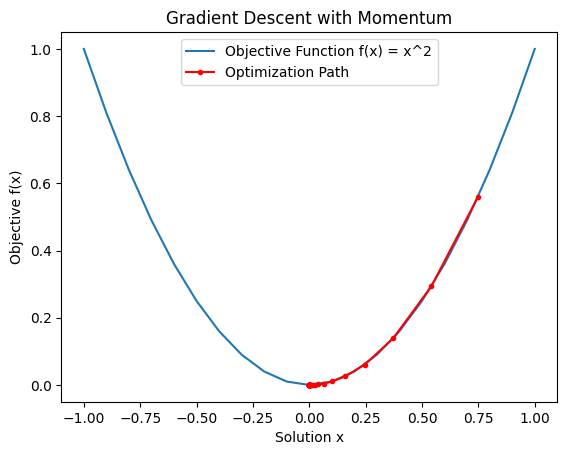

In [4]:
# Define the derivative of the objective function
def derivative(x):
    return x * 2.0


# Implement the gradient descent with momentum algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    solutions, scores = list(), list()

    # Initialize solution randomly within the bounds
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    change = 0.0

    for i in range(n_iter):
        gradient = derivative(solution)
        new_change = step_size * gradient + momentum * change
        solution = solution - new_change
        change = new_change

        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        # Print the current solution and objective evaluation
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# Seed for reproducibility
seed(4)

# Define the bounds of the solution
bounds = asarray([[-1.0, 1.0]])

# Define the number of iterations, step size, and momentum
n_iter = 30
step_size = 0.1
momentum = 0.3

# Run the gradient descent algorithm
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)

# Create an array of x values for plotting the objective function
inputs = arange(bounds[0,0], bounds[0,1] + 0.1, 0.1)
results = objective(inputs)


# Plot the objective function
pyplot.plot(inputs, results, label='Objective Function f(x) = x^2')

# Plot the optimization path
pyplot.plot(solutions, scores, '.-', color='red', label='Optimization Path')
pyplot.xlabel('Solution x')
pyplot.ylabel('Objective f(x)')
pyplot.title('Gradient Descent with Momentum')
pyplot.legend()
pyplot.show()


**Observation**
- The code snippet visualizes the convergence of the gradient descent algorithm by plotting the objective function and the solutions found at each iteration, providing a graphical representation of the optimization process.